# **Diabetes Prediction using Support Vector Machine**

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


Data Collection and Analysis

In [ ]:
# loading the diabetes dataset to a pandas dataframe
diabetes_df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
# printing the first 10 rows of the dataset
diabetes_df.head(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
95,Male,19.0,0,0,never,27.32,6.1,80,0
96,Female,67.0,0,0,never,27.32,6.2,159,1
97,Male,11.0,0,0,No Info,27.32,6.1,90,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0


In [ ]:
# printing number of rows and columns in the dataset
diabetes_df.shape

(100000, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Checking for missing values in the entire dataset
missing_values = diabetes_df.isna().sum()
print(missing_values)


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Checking for null values in the dataset
null_values = diabetes_df.isnull().sum()

# Displaying the count of null values for each column
print(null_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
# Check for duplicate records in the dataset
duplicates = diabetes_df[diabetes_df.duplicated(keep=False)]

# Display the duplicate records
print(duplicates)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
1      Female  54.0             0              0         No Info  27.32   
10     Female  53.0             0              0           never  27.32   
14     Female  76.0             0              0         No Info  27.32   
18     Female  42.0             0              0         No Info  27.32   
41       Male   5.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
1              6.6                   80        

In [ ]:
# Remove duplicate records from the dataset
diabetes_df = diabetes_df.drop_duplicates()

# Display the dataset with duplicates removed
print(diabetes_df)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [ ]:
diabetes_df['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

***0 --> Non diabetic***


***1 --> Diabetic***

# **Data Visualization**

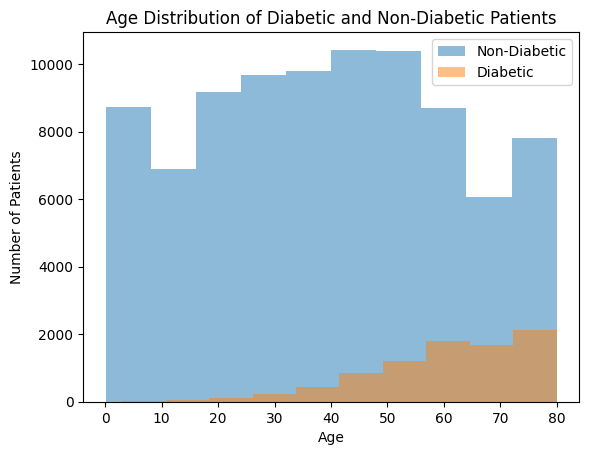

In [ ]:
# Split the data into diabetic and non-diabetic groups
diabetic = diabetes_df[diabetes_df['diabetes'] == 1]
non_diabetic = diabetes_df[diabetes_df['diabetes'] == 0]

# Create two histograms for age distribution
plt.hist(non_diabetic['age'], bins=10, alpha=0.5, label='Non-Diabetic')
plt.hist(diabetic['age'], bins=10, alpha=0.5, label='Diabetic')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Diabetic and Non-Diabetic Patients')

# Add a legend
plt.legend()

# Show the plot
plt.show()


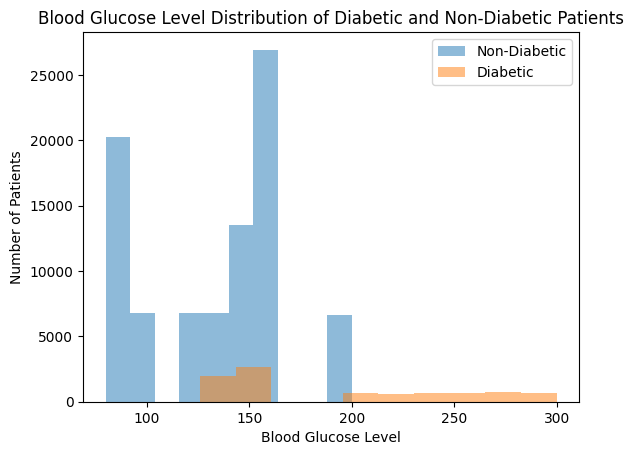

In [ ]:
# Create two histograms for blood glucose level distribution
plt.hist(non_diabetic['blood_glucose_level'], bins=10, alpha=0.5, label='Non-Diabetic')
plt.hist(diabetic['blood_glucose_level'], bins=10, alpha=0.5, label='Diabetic')

# Set labels and title
plt.xlabel('Blood Glucose Level')
plt.ylabel('Number of Patients')
plt.title('Blood Glucose Level Distribution of Diabetic and Non-Diabetic Patients')

# Add a legend
plt.legend()

# Show the plot
plt.show()

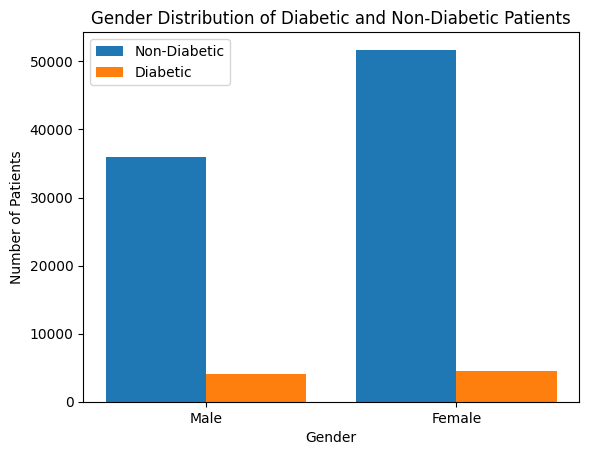

In [ ]:
# Ensure consistent gender categories for both groups
gender_categories = ['Male', 'Female']

# Create bar plots for gender distribution
gender_counts_non_diabetic = diabetes_df[diabetes_df['diabetes'] == 0]['gender'].value_counts()
gender_counts_diabetic = diabetes_df[diabetes_df['diabetes'] == 1]['gender'].value_counts()

# Fill in missing categories with zeros
for category in gender_categories:
    if category not in gender_counts_non_diabetic:
        gender_counts_non_diabetic[category] = 0
    if category not in gender_counts_diabetic:
        gender_counts_diabetic[category] = 0

# Sort the counts by gender categories
gender_counts_non_diabetic = gender_counts_non_diabetic[gender_categories]
gender_counts_diabetic = gender_counts_diabetic[gender_categories]

# Create the bar plot
width = 0.4
x = range(len(gender_categories))
plt.bar(x, gender_counts_non_diabetic, width, label='Non-Diabetic', align='center')
plt.bar([i + width for i in x], gender_counts_diabetic, width, label='Diabetic', align='center')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Gender Distribution of Diabetic and Non-Diabetic Patients')

# Set x-axis ticks and labels
plt.xticks([i + width/2 for i in x], gender_categories)

# Add a legend
plt.legend()

# Show the plot
plt.show()

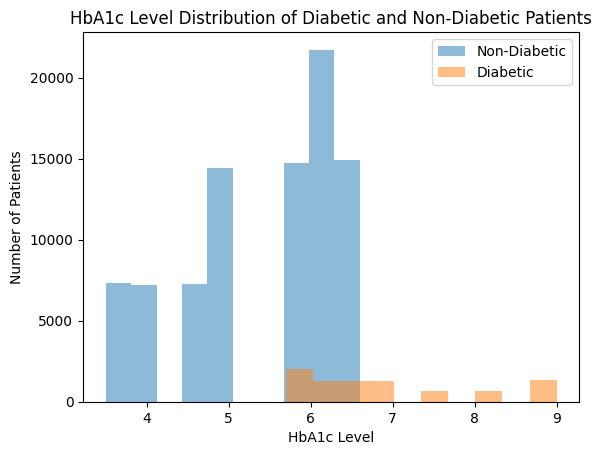

In [ ]:
# Create two histograms for HbA1c level distribution
plt.hist(non_diabetic['HbA1c_level'], bins=10, alpha=0.5, label='Non-Diabetic')
plt.hist(diabetic['HbA1c_level'], bins=10, alpha=0.5, label='Diabetic')

# Set labels and title
plt.xlabel('HbA1c Level')
plt.ylabel('Number of Patients')
plt.title('HbA1c Level Distribution of Diabetic and Non-Diabetic Patients')

# Add a legend
plt.legend()

# Show the plot
plt.show()

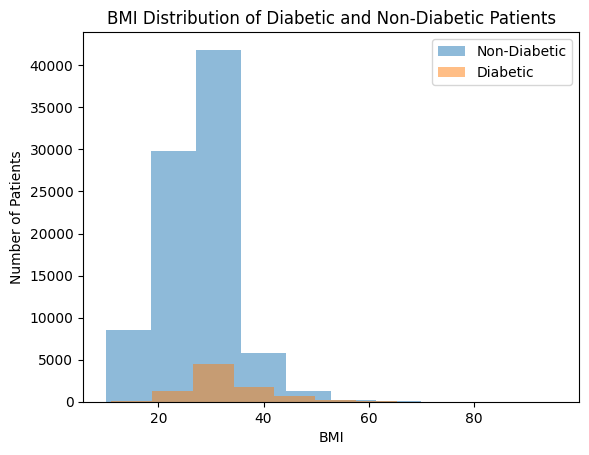

In [ ]:
# Create two histograms for BMI distribution
plt.hist(non_diabetic['bmi'], bins=10, alpha=0.5, label='Non-Diabetic')
plt.hist(diabetic['bmi'], bins=10, alpha=0.5, label='Diabetic')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.title('BMI Distribution of Diabetic and Non-Diabetic Patients')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# **Checking Class Imbalance**

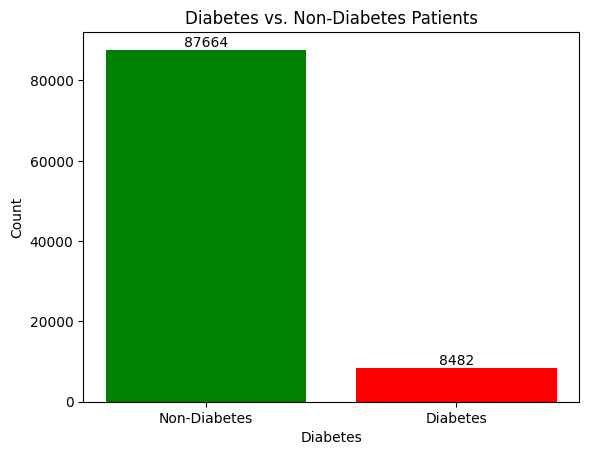

In [ ]:
# Count the number of diabetes and non-diabetes patients
diabetes_counts = diabetes_df['diabetes'].value_counts()

# Create a bar chart
plt.bar(diabetes_counts.index, diabetes_counts.values, color=['green', 'red'])
plt.title('Diabetes vs. Non-Diabetes Patients')
plt.xlabel('Diabetes')
plt.ylabel('Count')

# Add labels to the bars
for i, count in enumerate(diabetes_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set the x-axis labels
plt.xticks(diabetes_counts.index, ['Non-Diabetes', 'Diabetes'])

# Show the plot
plt.show()


 From above bar chart we can identify that there is a definite class imbalance between diabetic and non diabetic patients

In [ ]:
diabetes_df.groupby('diabetes').mean()

<ipython-input-38-d610cadc74cf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diabetes_df.groupby('diabetes').mean()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,39.943229,0.061314,0.030297,26.869003,5.396936,132.818489
1,60.925961,0.245933,0.149375,31.997755,6.934827,194.026173


Label Encoding for gender

***0 --> Female***

***1 -->Male***

In [ ]:
label_encoder = LabelEncoder()
diabetes_df['gender'] = label_encoder.fit_transform(diabetes_df['gender'])

Label encoding for smoking_history

No info --> 0
current --> 1
ever --> 2
former --> 3
never --> 4
not current --> 5

In [ ]:
unique_values = diabetes_df['smoking_history'].unique()
print(unique_values)

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
label_encoder = LabelEncoder()
diabetes_df['smoking_history'] = label_encoder.fit_transform(diabetes_df['smoking_history'])
unique_values = diabetes_df['smoking_history'].unique()
print(unique_values)

[4 0 1 3 2 5]


In [ ]:
# seperating the data and labels
X = diabetes_df.drop(columns = 'diabetes', axis=1)
Y = diabetes_df['diabetes']

In [ ]:
print(X)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99994       0  36.0             0              0                0  24.60   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1  

In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
standardized_data = scaler.fit_transform(X)

In [ ]:
print(standardized_data)

[[-8.43459189e-01  1.70083970e+00 -2.90050377e-01 ... -3.14947071e-01
   9.94562951e-01  4.35538650e-02]
 [-8.43459189e-01  5.43372045e-01 -2.90050377e-01 ... -2.15895425e-04
   9.94562951e-01 -1.42309603e+00]
 [ 1.18376945e+00 -6.14095608e-01 -2.90050377e-01 ... -2.15895425e-04
   1.55970122e-01  4.83548835e-01]
 ...
 [ 1.18376945e+00  1.07758788e+00 -2.90050377e-01 ...  7.51422735e-02
   1.55970122e-01  4.10216340e-01]
 [-8.43459189e-01 -7.92167555e-01 -2.90050377e-01 ...  1.19664914e+00
  -1.42803856e+00 -9.34212734e-01]
 [-8.43459189e-01  6.76926005e-01 -2.90050377e-01 ... -7.22767750e-01
   9.94562951e-01 -1.17865438e+00]]


In [ ]:
X = standardized_data
Y = diabetes_df['diabetes']

In [ ]:
print(X)
print(Y)

[[-8.43459189e-01  1.70083970e+00 -2.90050377e-01 ... -3.14947071e-01
   9.94562951e-01  4.35538650e-02]
 [-8.43459189e-01  5.43372045e-01 -2.90050377e-01 ... -2.15895425e-04
   9.94562951e-01 -1.42309603e+00]
 [ 1.18376945e+00 -6.14095608e-01 -2.90050377e-01 ... -2.15895425e-04
   1.55970122e-01  4.83548835e-01]
 ...
 [ 1.18376945e+00  1.07758788e+00 -2.90050377e-01 ...  7.51422735e-02
   1.55970122e-01  4.10216340e-01]
 [-8.43459189e-01 -7.92167555e-01 -2.90050377e-01 ...  1.19664914e+00
  -1.42803856e+00 -9.34212734e-01]
 [-8.43459189e-01  6.76926005e-01 -2.90050377e-01 ... -7.22767750e-01
   9.94562951e-01 -1.17865438e+00]]
0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(96146, 8) (76916, 8) (19230, 8)


# **Implementation of Synthetic Minor Oversampling Technique(SMOTE) to solve Class imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
#Fitting SMOTE to the training set
smote = SMOTE(random_state = 27)
smote_X_train, smote_Y_train = smote.fit_resample(X_train,Y_train)

print("Before sampling, Class Distribution:- ",Counter(Y_train))
print("After sampling, Class Distribution:- ",Counter(smote_Y_train))

Before sampling, Class Distribution:-  Counter({0: 70130, 1: 6786})
After sampling, Class Distribution:-  Counter({0: 70130, 1: 70130})


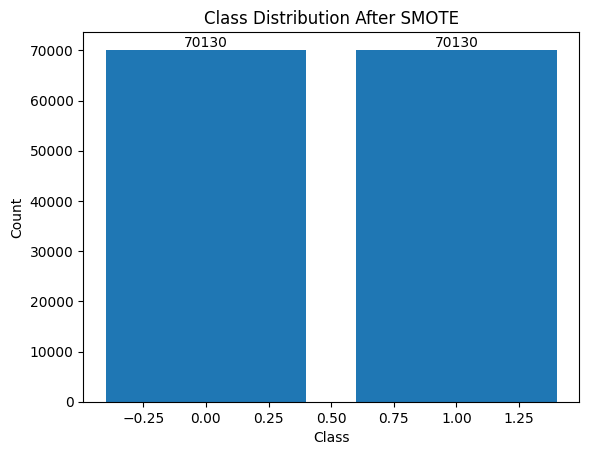

In [ ]:
class_distribution = Counter(smote_Y_train)

# Create a bar chart
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Add labels to the bars
for class_label, count in class_distribution.items():
    plt.text(class_label, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# **Support Vector Machine**

Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
# training the support vector machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
#accuracy score on the training data
X_train_predict = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)
print("Accuracy Score of the training data: ",training_data_accuracy)

Accuracy Score of the training data:  0.9593842633522284


In [ ]:
#accuracy score on the test data
X_test_predict = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)
print("Accuracy Score of the test data: ",test_data_accuracy)

Accuracy Score of the test data:  0.9601664066562663


In [ ]:
confusion_matrix(X_test_predict,Y_test)

array([[17444,   676],
       [   90,  1020]])

In [ ]:
print(classification_report(X_test_predict,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18120
           1       0.60      0.92      0.73      1110

    accuracy                           0.96     19230
   macro avg       0.80      0.94      0.85     19230
weighted avg       0.97      0.96      0.96     19230



Making a predictive system

In [ ]:
input_data = (0,77,0,0,4,31.7,6.5,280)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
  print("The patient is not suffering from diabetes")

else:
  print("The patient is suffering from diabetes")


[[-0.84345919  1.56728574 -0.29005038 -0.2062479   0.94089638  0.64697779
   0.90138597  3.46573696]]
[1]
The patient is suffering from diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
file_name = 'trained_model_using_SVM.sav'
pickle.dump(classifier,open(file_name,'wb'))
standard_data = 'standard_scaler.sav'
pickle.dump(scaler,open(standard_data,'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model_using_SVM.sav','rb'))
# loading the standard scaler
loaded_scaler = pickle.load(open('standard_scaler.sav','rb'))

In [ ]:
input_data = (0,77,0,0,4,31.7,6.5,280)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
std_data = loaded_scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if prediction[0] == 0:
  print("The patient is not suffering from diabetes")

else:
  print("The patient is suffering from diabetes")

[[-0.84345919  1.56728574 -0.29005038 -0.2062479   0.94089638  0.64697779
   0.90138597  3.46573696]]
[1]
The patient is suffering from diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Logistic Regression**

Model Training

In [ ]:
model_LR = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model_LR.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model_LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9588642155078267


In [ ]:
# accuracy on test data
X_test_prediction = model_LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.958814352574103


In [ ]:
confusion_matrix(X_test_predict,Y_test)

array([[17444,   676],
       [   90,  1020]])

In [ ]:
print(classification_report(X_test_predict,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18120
           1       0.60      0.92      0.73      1110

    accuracy                           0.96     19230
   macro avg       0.80      0.94      0.85     19230
weighted avg       0.97      0.96      0.96     19230



Making a Predictive System

In [ ]:
input_data = (0,43,0,0,1,18.67,6.2,140)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# standardize the input data using the same scaler
standardized_input = scaler.transform(input_data_as_numpy_array)

# make predictions
prediction = model_LR.predict(standardized_input)
print(prediction)

if (prediction[0] == 0):
  print('The Person does not have diabetes')
else:
  print('The Person has diabetes')

[0]
The Person does not have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
file_name = 'trained_model_using_LR.sav'
pickle.dump(model_LR,open(file_name,'wb'))

In [ ]:
# loading the saved model
loaded_model_LR = pickle.load(open('trained_model_using_LR.sav','rb'))

In [ ]:
input_data = (0,43,0,0,1,18.67,6.2,140)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
std_data = loaded_scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model_LR.predict(std_data)
print(prediction)

if prediction[0] == 0:
  print("The Person does not have diabetes")

else:
  print("The Person has diabetes")

[[-0.84345919  0.05367419 -0.29005038 -0.2062479  -0.65488805 -1.27834954
   0.62185503  0.04355386]]
[0]
The Person does not have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Random Forest**

Model Training

In [ ]:
# Create a Random Forest model
model_RF = RandomForestClassifier(random_state=2)

# Train the Random Forest model with Training data
model_RF.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

Model Evaluation

Accuracy Score

In [ ]:
# Accuracy on training data
X_train_prediction = model_RF.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = model_RF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.9992069270372874
Accuracy on Test data :  0.9706188247529901


In [ ]:
confusion_matrix(X_test_predict,Y_test)

array([[17444,   676],
       [   90,  1020]])

In [ ]:
print(classification_report(X_test_predict,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18120
           1       0.60      0.92      0.73      1110

    accuracy                           0.96     19230
   macro avg       0.80      0.94      0.85     19230
weighted avg       0.97      0.96      0.96     19230



Making a Predictive System

In [ ]:
# Input data for prediction
input_data = (0,77,0,0,4,31.7,6.5,280)

# Change the input data to a numpy array and reshape it
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Standardize the input data using the same scaler
standardized_input = scaler.transform(input_data_as_numpy_array)

# Make predictions using the Random Forest model
prediction = model_RF.predict(standardized_input)

if prediction[0] == 0:
    print('The Person does not have diabetes')
else:
  print('The Person has diabetes')

The Person has diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
file_name = 'trained_model_using_RF.sav'
pickle.dump(model_RF,open(file_name,'wb'))

In [ ]:
# loading the saved model
loaded_model_RF = pickle.load(open('trained_model_using_RF.sav','rb'))

In [ ]:
input_data = (0,43,0,0,1,18.67,6.2,140)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
std_data = loaded_scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if prediction[0] == 0:
  print("The Person does not have diabetes")

else:
  print("The Person has diabetes")

[[-0.84345919  0.05367419 -0.29005038 -0.2062479  -0.65488805 -1.27834954
   0.62185503  0.04355386]]
[0]
The Person does not have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Decision Tree**

Model Training

In [ ]:
# Create a Decision Tree model
model_DT = DecisionTreeClassifier(random_state=2)

# Train the Decision Tree model with Training data
model_DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

Model Evaluation

Accuracy Score

In [ ]:
# Accuracy on training data
X_train_prediction = model_DT.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = model_DT.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.9992329294295075
Accuracy on Test data :  0.9505460218408737


In [ ]:
confusion_matrix(X_test_predict,Y_test)

array([[17444,   676],
       [   90,  1020]])

In [ ]:
print(classification_report(X_test_predict,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18120
           1       0.60      0.92      0.73      1110

    accuracy                           0.96     19230
   macro avg       0.80      0.94      0.85     19230
weighted avg       0.97      0.96      0.96     19230



Making a Predictive System

In [ ]:
# Input data for prediction
input_data = (0,77,0,0,4,31.7,6.5,280)

# Change the input data to a numpy array and reshape it
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Standardize the input data using the same scaler
standardized_input = scaler.transform(input_data_as_numpy_array)

# Make predictions using the Decision Tree model
prediction = model_DT.predict(standardized_input)

if prediction[0] == 0:
    print('The Person does not have diabetes')
else:
    print('The Person has diabetes')

The Person has diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
file_name = 'trained_model_using_DT.sav'
pickle.dump(model_DT,open(file_name,'wb'))

In [ ]:
# loading the saved model
loaded_model_DT = pickle.load(open('trained_model_using_DT.sav','rb'))

In [ ]:
input_data = (0,43,0,0,1,18.67,6.2,140)

#changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardizing the input data
std_data = loaded_scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model_DT.predict(std_data)
print(prediction)

if prediction[0] == 0:
  print("The Person does not have diabetes")

else:
  print("The Person has diabetes")

[[-0.84345919  0.05367419 -0.29005038 -0.2062479  -0.65488805 -1.27834954
   0.62185503  0.04355386]]
[0]
The Person does not have diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
